# Defining DataFrame for every player playing a game

In [1]:
import pickle
import pandas as pd
import copy
import numpy as np
import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from utils import *
from scipy.optimize import curve_fit


with open('basket_data.pkl', 'rb') as file:
    save_dict = pickle.load(file)
    
players_df = pd.DataFrame(save_dict['player_games'])
players_df = pd.read_pickle('players_df_clean')
players_df.head(5)

,#,%_1PT,%_2PT,%_3PT,+/-,AS,A_1PT,A_2PT,A_3PT,BKA_Blocks,...,TO,TR_Rebounds,VAL,datr,game_id,game_name,player_id,player_name,team_id,team_name
0,1.0,0.667,0.667,0.000,NaN,2.0,3.0,3,1,1.0,...,1.0,2.0,9.0,2006-11-05,2963,M. Tel-Aviv (A) L,3,Matan Naor,37,hapoel migdal jerusalem (coach: dan shamir)
1,1.0,1.000,0.667,0.333,NaN,3.0,1.0,6,3,0.0,...,2.0,2.0,11.0,2006-11-05,2963,M. Tel-Aviv (A) L,13,Eduardo Cota,37,hapoel migdal jerusalem (coach: dan shamir)
2,1.0,0.500,0.000,0.000,NaN,0.0,2.0,2,0,0.0,...,1.0,1.0,-1.0,2006-11-05,2963,M. Tel-Aviv (A) L,134,Tamar Slay,37,hapoel migdal jerusalem (coach: dan shamir)
3,1.0,1.000,0.667,0.333,NaN,5.0,2.0,6,3,0.0,...,2.0,0.0,17.0,2006-11-05,2963,Hapoel J. (H) W,2,Willian Bynum,36,M. Tel-Aviv
4,1.0,0.333,0.545,0.500,NaN,0.0,3.0,11,2,1.0,...,3.0,9.0,15.0,2006-11-05,2963,M. Tel-Aviv (A) L,63,Mario Austin,37,Hapoel J.


# dropping duplicates and adding date

In [ ]:
games_ids = games_df['game_id']
players_ids = players_df['player_id']

players_df = players_df.drop_duplicates(subset=['game_id', 'player_id'])
    
df_dates = games_df[['game_id', 'datr']].copy()
df_dates['game_id'] = df_dates['game_id'].astype(str)
players_df = players_df.merge(df_dates, on='game_id')

players_df.to_pickle('players_df')

In [ ]:
with open('winner_games.pkl', 'rb') as file:
    all_winner_games = pickle.load(file)
    
winner_df = pd.DataFrame(all_winner_games)
winner_df.head(10)

# Optional: loading games_df:

In [ ]:
games_df = pd.read_pickle('games_df')

# Create and save games Dataframe: 
* DataFrame for each game with tables replaced by player's id

In [2]:
games_df = create_games_df()
games_df.to_pickle('games_df')
games_df.head(5)

,away_team_id,away_team_name,away_team_points,datr,game_id,home_team_id,home_team_name,home_team_points,player_away0,player_away1,...,player_home12,player_home2,player_home3,player_home4,player_home5,player_home6,player_home7,player_home8,player_home9,month_idx
0,843,Bnei Herzelia (Coach: Matan Harush),60,2013-04-17,7599,851,Hapoel Tel Aviv (Coach: Erez Edelshtein),79,9517,9471,...,0,9482,9634,9635,9680,9636,9497,9480,9481,271
1,747,Hapoel Beko Holon (Coach: ),72,2010-04-15,5350,750,Irony Naharya (Coach: Yaacov Jino),78,8876,9053,...,0,9026,9064,9061,8984,9047,8945,9052,0,235
2,401,Hapoel Tel Aviv (Coach: Zvika Sherf),81,1994-12-11,4149,120,Maccabi Tel-Aviv (Coach: Muli Katzurin),93,7470,7465,...,0,7389,7391,7394,7388,7392,7397,0,0,51
3,742,Hapoel Holon (Coach: Ilan Kowalsky),83,1993-11-21,3943,543,Hapoel Gvat (Coach: Hanoch Mintz),84,7382,7381,...,0,7360,7371,7362,7359,7365,0,0,0,38
4,471,Maccabi Ra'ananna (Coach: Sharon Drucker),66,1999-09-13,4758,125,Maccabi Tel-Aviv (Coach: Pini Gershon),81,8318,8317,...,0,8211,8214,8218,8216,8210,8215,8212,0,108


# Searching for missing players' ID:
* saving a variable containing all found players' IDs

In [26]:
#finding missing players' ID:
all_players_ids = []
for k in tqdm(range(12)):
    all_players_ids.append(games_df['player_away' + str(k)].tolist())
    all_players_ids.append(games_df['player_home' + str(k)].tolist())

all_players_ids = np.array(all_players_ids)
all_players_ids = np.reshape(all_players_ids, (1, 24*4375))
all_players_ids = np.unique(all_players_ids)
all_players_ids = all_players_ids[1:len(all_players_ids)]

chosen_idxs = []
for k in tqdm(range(len(all_players_ids))):
    player_rows = players_df[players_df['player_id'] == str(all_players_ids[k])]
    if len(player_rows) == 0:
        chosen_idxs.append(k)

all_players_ids = all_players_ids[chosen_idxs]
np.save('all_players_ids', all_players_ids)

array([    3,     5,    10, ..., 11155, 11156, 11157])

# Plotting histograms for away and home points distribution 

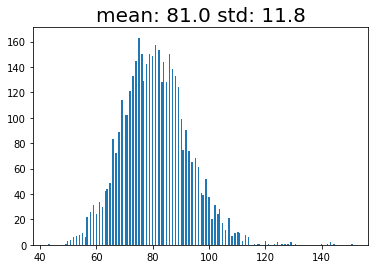

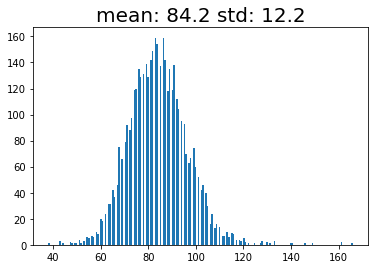

In [5]:
plt.hist(games_df['away_team_points'], bins=200);
plt.title('Away stats: mean: {:.1f} std: {:.1f}'.format(np.mean(games_df['away_team_points']), np.std(games_df['away_team_points'])), fontsize=20);
plt.figure()
plt.hist(games_df['home_team_points'], bins=200);

plt.title('Home stats: mean: {:.1f} std: {:.1f}'.format(np.mean(games_df['home_team_points']), np.std(games_df['home_team_points'])), fontsize=20);

# plotting histograms for away and home points distribution per month

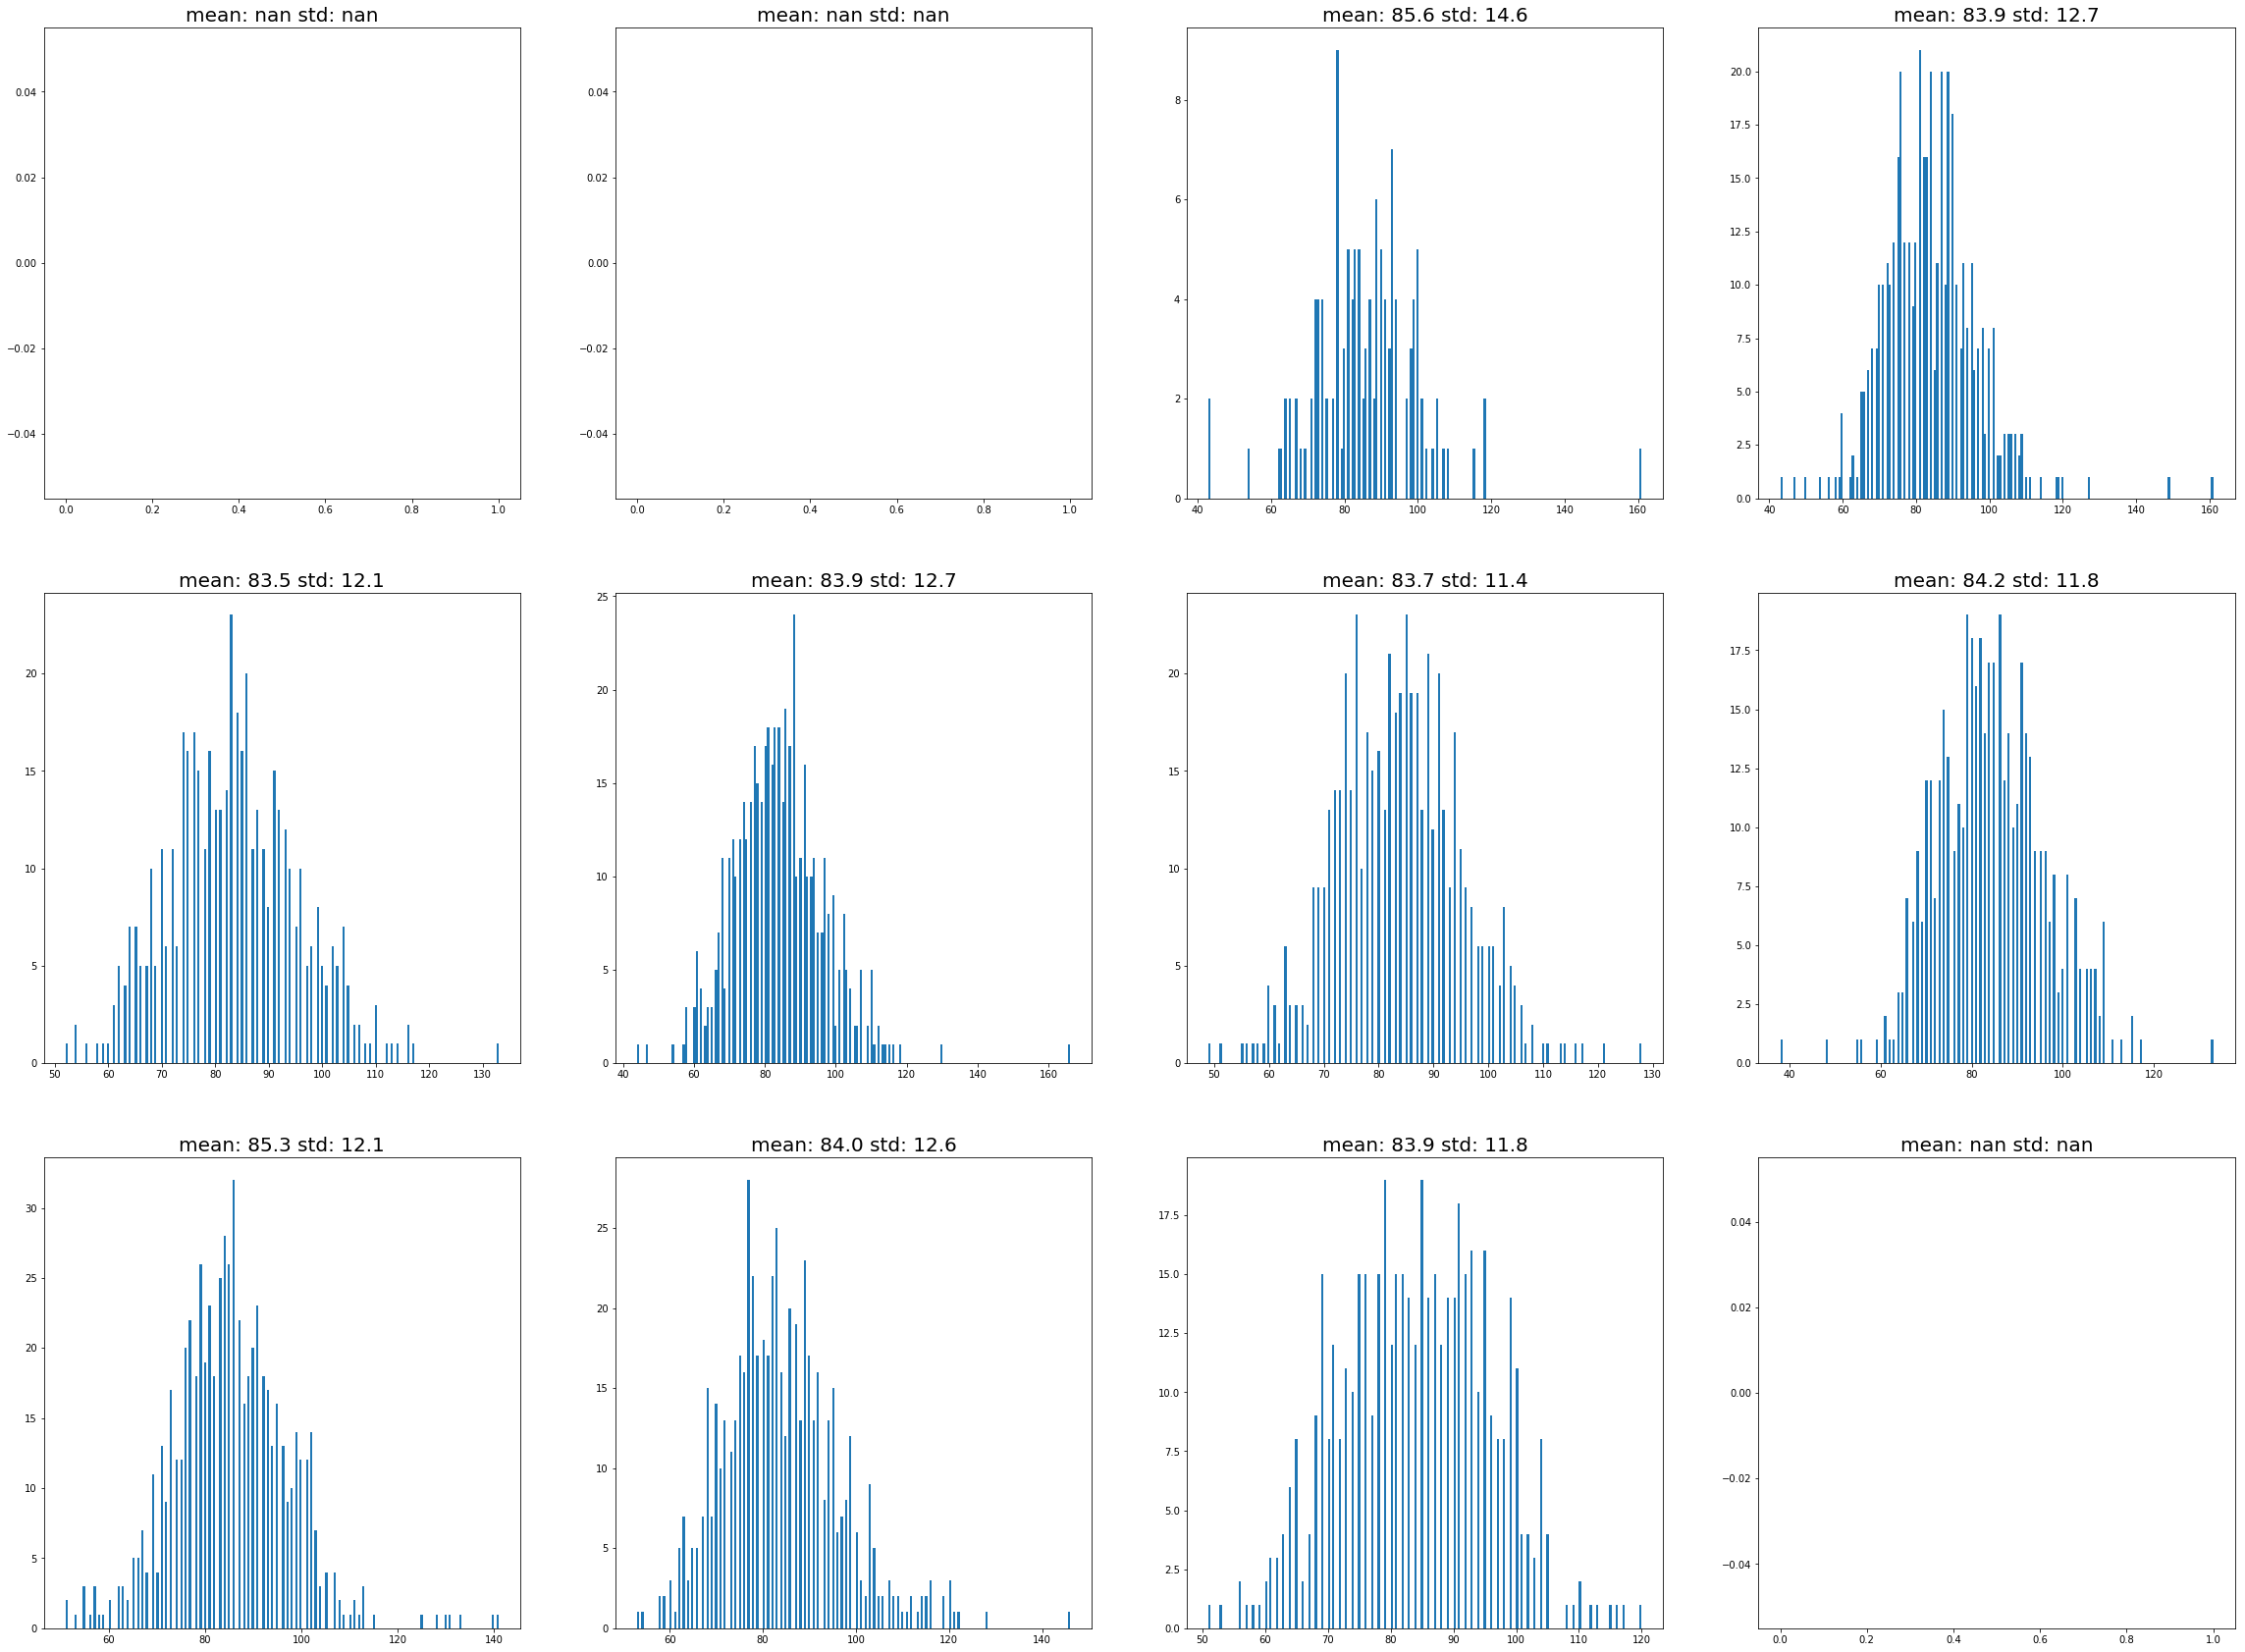

In [6]:
#home score distribution by month
FIG_SIZE = 50
NUM_ROWS = 3
NUM_COLS = 4
plt.figure(figsize=[NUM_COLS*10,NUM_ROWS*10])
for i in range(12):
    plt.subplot(NUM_ROWS, NUM_COLS ,i+1)
    months_list = games_df['month_idx'].tolist()
    cur_month_df = games_df[np.mod(np.mod(months_list, 12) - 9, 12) == i + 1]
    cur_home_points = cur_month_df['home_team_points']
    plt.title('mean: {:.1f} std: {:.1f}'.format(np.mean(cur_home_points), np.std(cur_home_points)), fontsize=20)
    plt.hist(cur_home_points, bins=200)
plt.show()

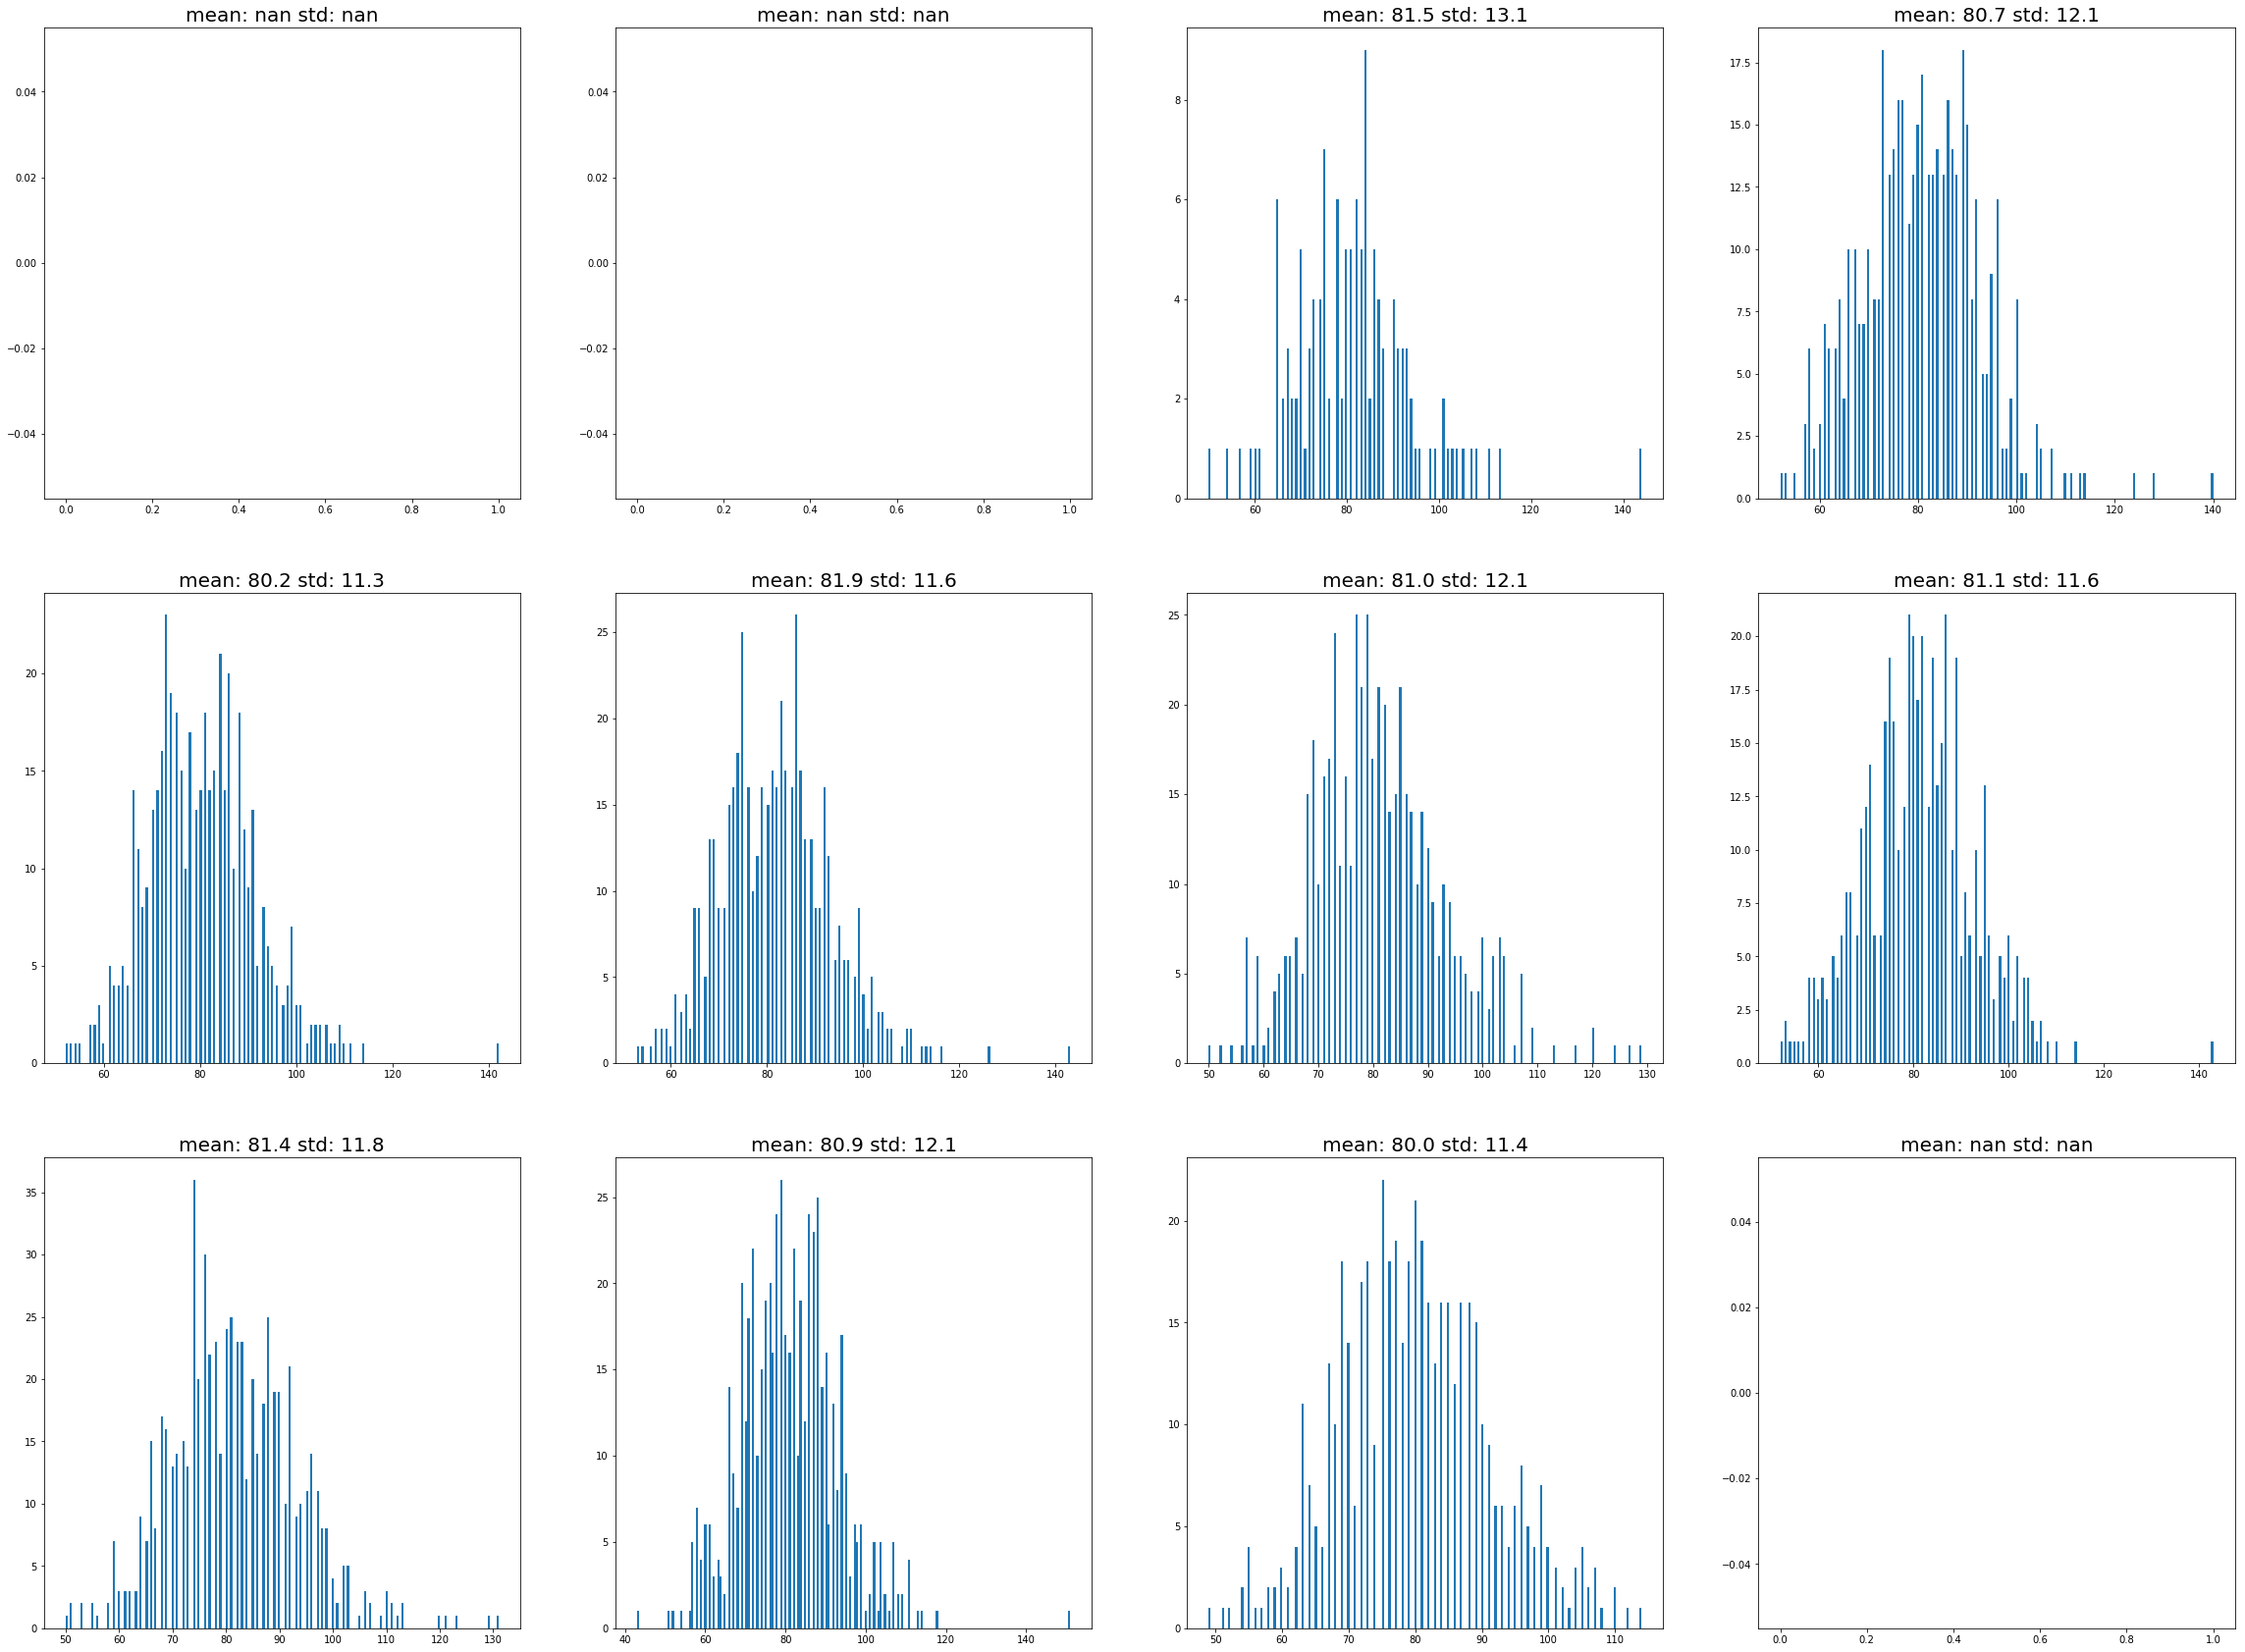

In [7]:
#away score distribution by month
FIG_SIZE = 50
NUM_ROWS = 3
NUM_COLS = 4
plt.figure(figsize=[NUM_COLS*10,NUM_ROWS*10])
for i in range(12):
    plt.subplot(NUM_ROWS, NUM_COLS ,i+1)
    months_list = games_df['month_idx'].tolist()
    cur_month_df = games_df[np.mod(np.mod(months_list, 12) - 9, 12) == i + 1]
    cur_away_points = cur_month_df['away_team_points']
    plt.title('mean: {:.1f} std: {:.1f}'.format(np.mean(cur_away_points), np.std(cur_away_points)), fontsize=20)
    plt.hist(cur_away_points, bins=200)
plt.show()

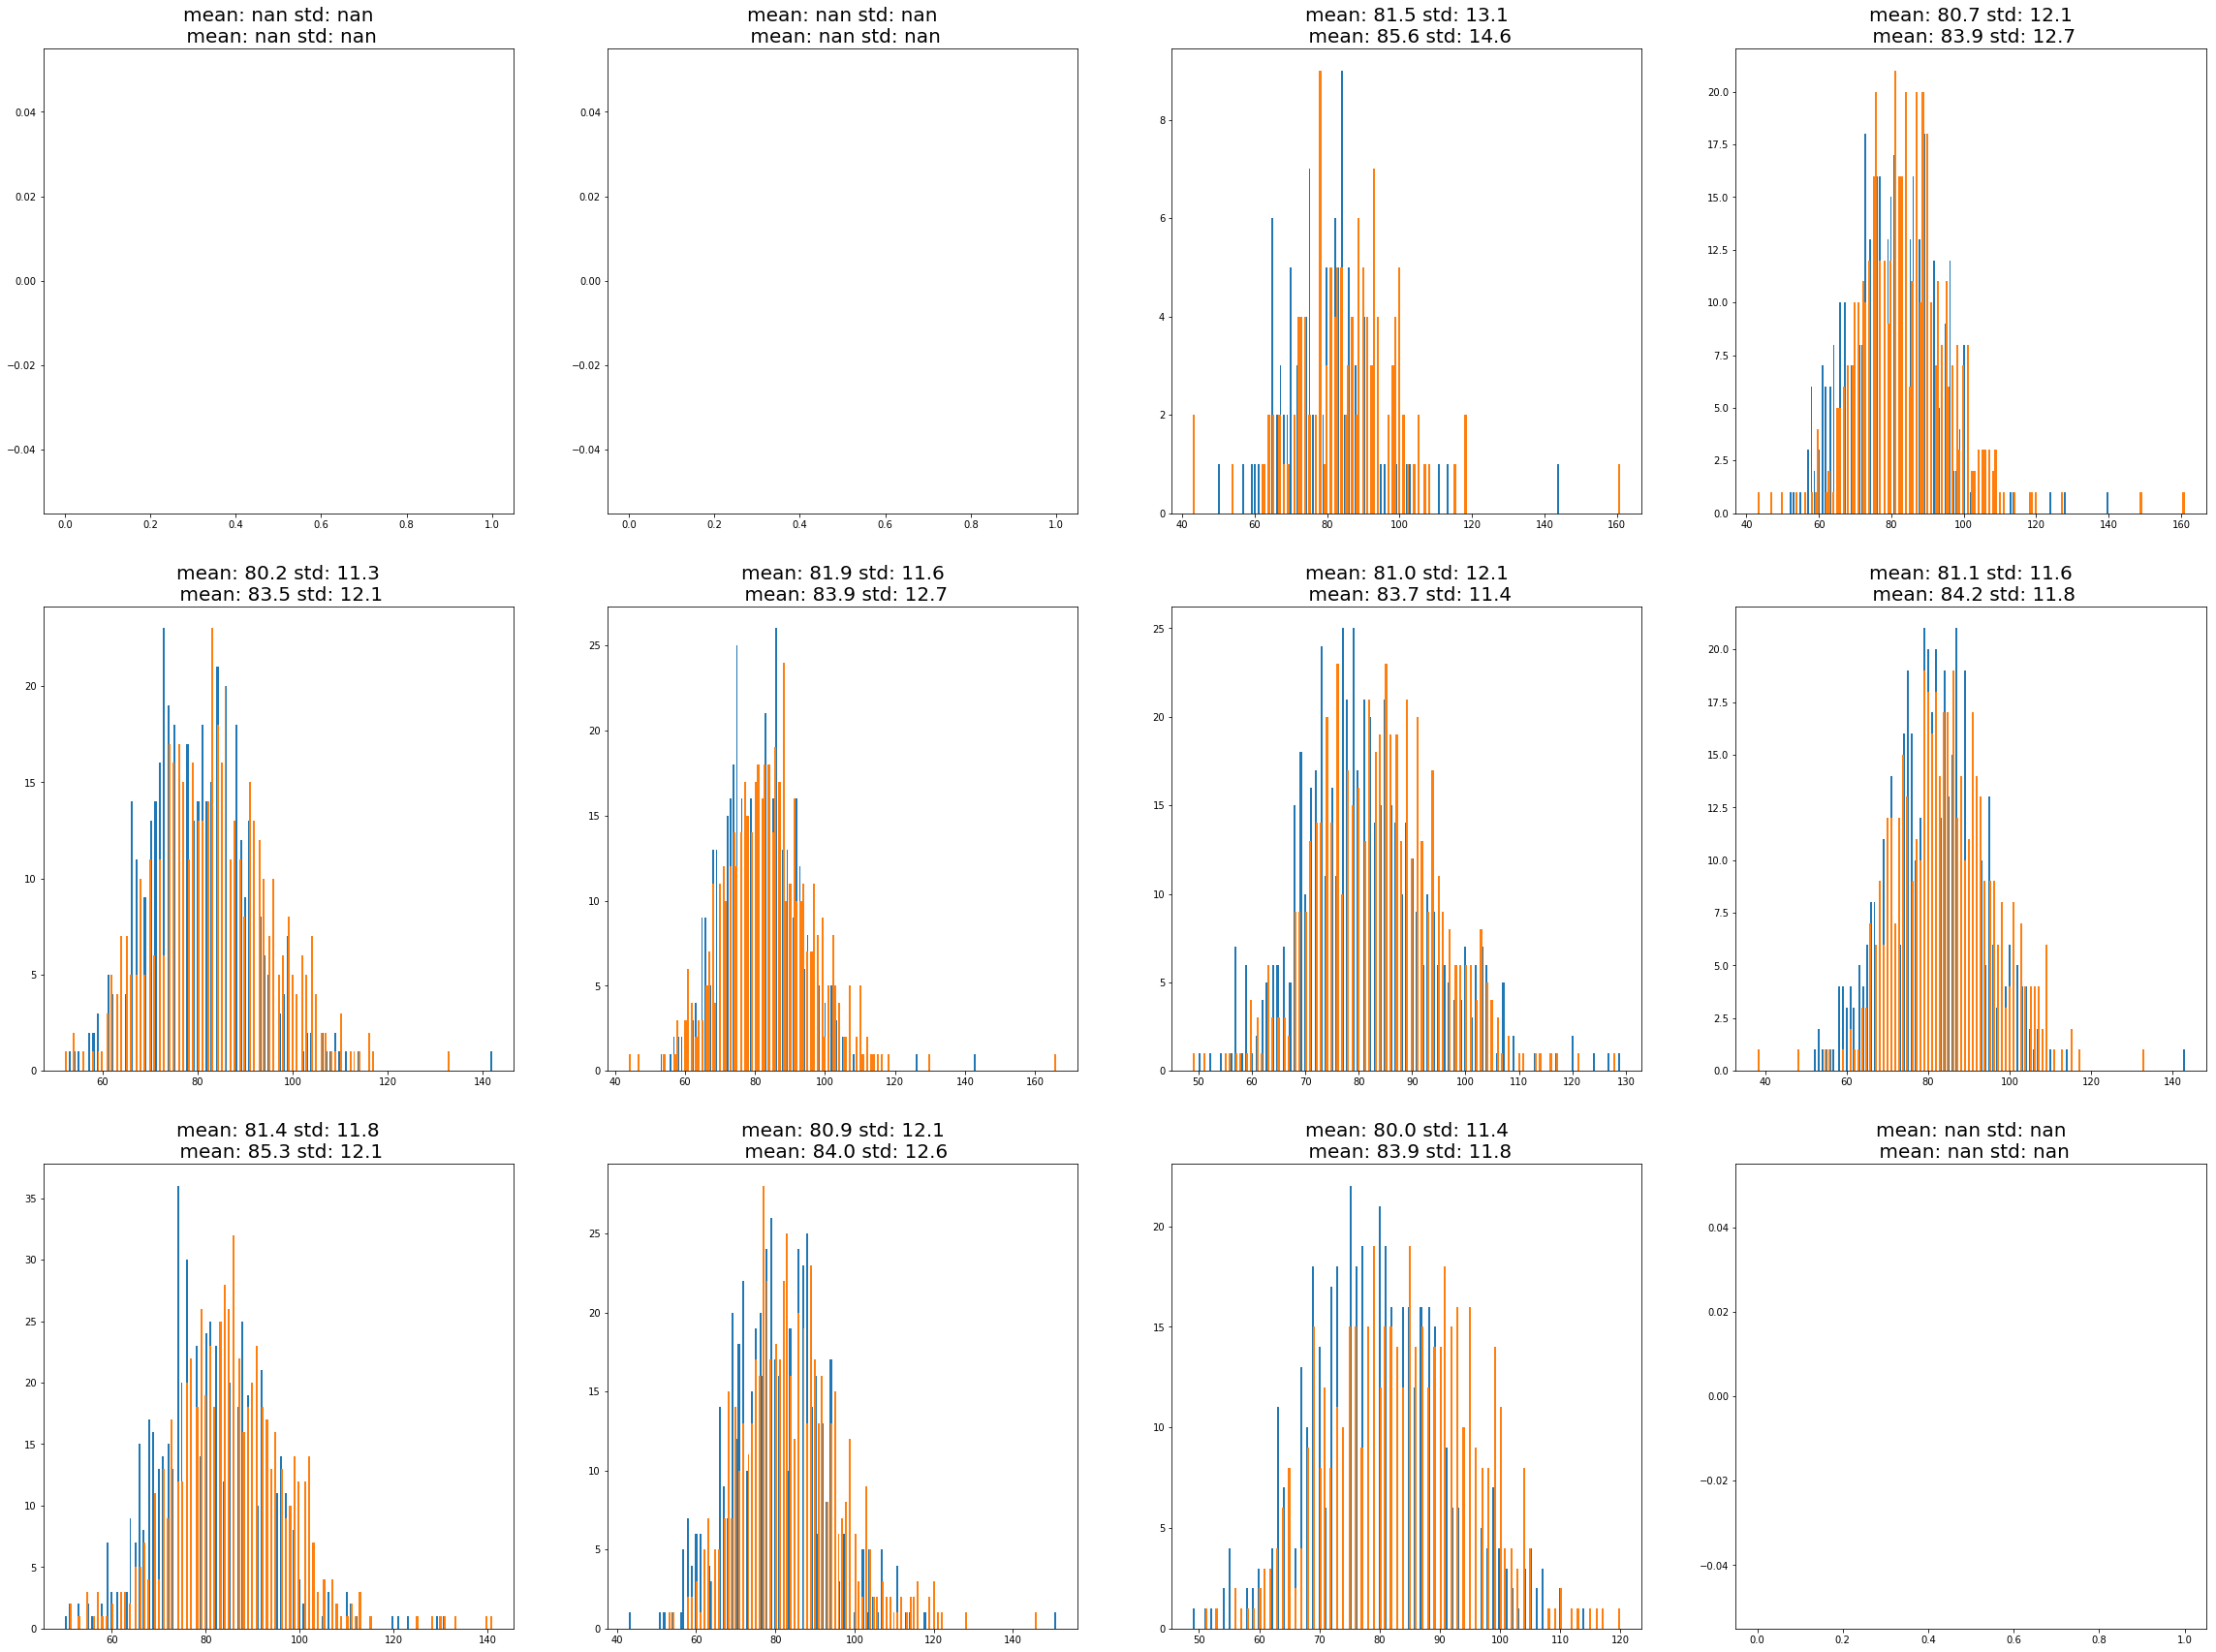

In [8]:
#combined score distribution by month
FIG_SIZE = 50
NUM_ROWS = 3
NUM_COLS = 4
plt.figure(figsize=[NUM_COLS*10,NUM_ROWS*10])
for i in range(12):
    plt.subplot(NUM_ROWS, NUM_COLS ,i+1)
    months_list = games_df['month_idx'].tolist()
    cur_month_df = games_df[np.mod(np.mod(months_list, 12) - 9, 12) == i + 1]
    cur_away_points = cur_month_df['away_team_points']
    cur_home_points = cur_month_df['home_team_points']
    plt.title('mean: {:.1f} std: {:.1f}\n mean: {:.1f} std: {:.1f}'.format(np.mean(cur_away_points), np.std(cur_away_points), np.mean(cur_home_points), np.std(cur_home_points)), fontsize=20)
    plt.hist(cur_away_points, bins=200)
    plt.hist(cur_home_points, bins=200)
plt.show()

# plotting number of minutes played vs. num of throws

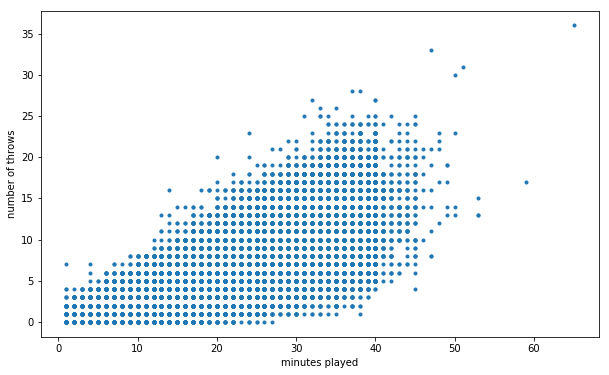

In [9]:
players_df2 = copy.deepcopy(players_df)
minutes = copy.deepcopy(players_df['Min'])
idxs = np.logical_not(np.isnan(minutes))
minutes = minutes[idxs]
a_2p = copy.deepcopy(players_df['A_2PT'])
a_3p = copy.deepcopy(players_df['A_3PT'])
m_2p = copy.deepcopy(players_df['M_2PT'])
m_3p = copy.deepcopy(players_df['M_3PT'])
a_2p = a_2p[idxs]
m_2p = m_2p[idxs]
a_3p = a_3p[idxs]
m_3p = m_3p[idxs]
plt.figure(figsize=[10, 6])
plt.plot(minutes, a_2p + a_3p, '.');
plt.xlabel('minutes played');
plt.ylabel('number of throws');

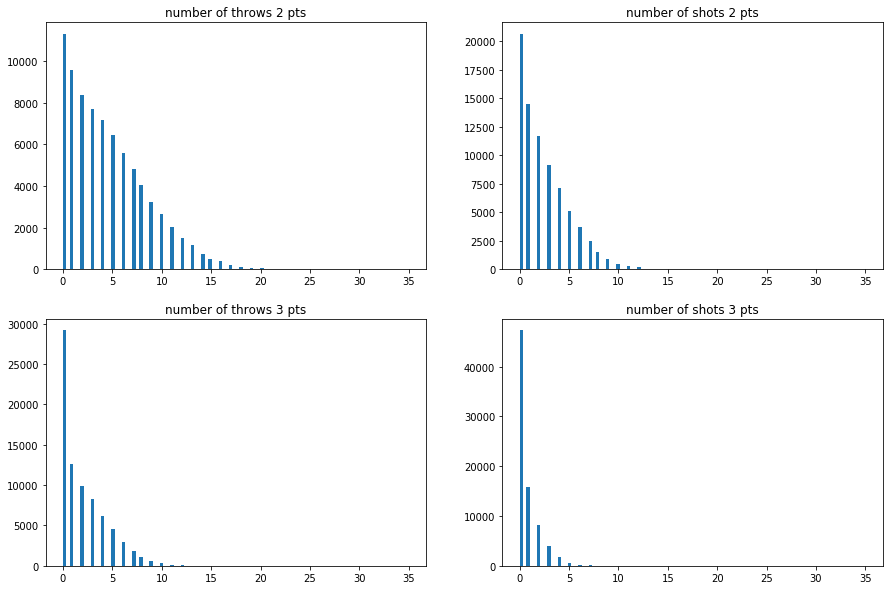

In [10]:
plt.figure(figsize=[15,10])
plt.subplot(2, 2, 1)
plt.hist(players_df['A_2PT'], bins=100, range=(0, 35));
plt.title('number of throws 2 pts')
plt.subplot(2, 2, 2);
plt.hist(players_df['M_2PT'], bins=100, range=(0, 35));
plt.title('number of shots 2 pts');
plt.subplot(2, 2, 3)
plt.hist(players_df['A_3PT'], bins=100, range=(0, 35));
plt.title('number of throws 3 pts')
plt.subplot(2, 2, 4);
plt.hist(players_df['M_3PT'], bins=100, range=(0, 35));
plt.title('number of shots 3 pts');

# plotting relation between number of points, throws/shots ratio and minutes played

In [39]:
players_df2['throws/shots_ratio'] = np.divide(players_df2['M_2PT'] + players_df2['M_3PT'], players_df2['A_2PT'] + players_df2['A_3PT'])
ratio = players_df2['throws/shots_ratio']
ratio[np.isinf(ratio)] = 0
#players_df2[np.isinf(players_df2['throws/shots_ratio'])]['throws/shots_ratio'] =  0
players_ratio_df = players_df2.groupby('player_id')['throws/shots_ratio', 'Min', 'Pts'].mean()
players_ratio_df.head(10)

c:\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
c:\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
c:\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,throws/shots_ratio,Min,Pts
player_id,,,
10,0.000000,1.272727,0.181818
100,0.633492,25.090909,14.727273
10000,0.515401,19.285714,8.228571
10001,0.460952,13.800000,5.800000
10002,0.241071,7.535714,1.250000
10003,0.500000,2.000000,0.600000
10004,0.412798,20.000000,8.214286
10005,0.372454,22.947368,9.473684
10006,0.583333,12.500000,4.500000


Text(0.5,0,'players_mean_points')

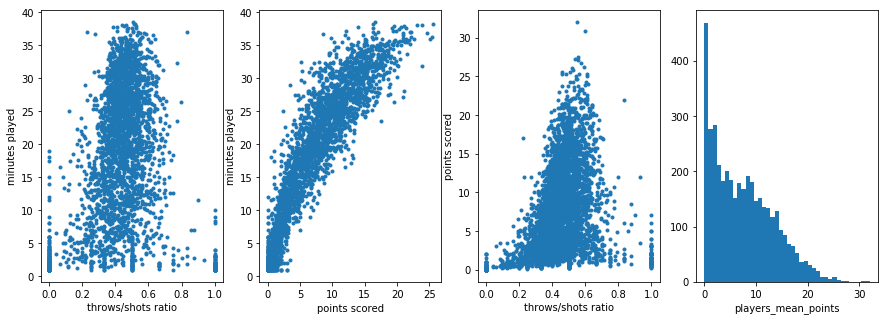

In [45]:
plt.figure(figsize=[15,5])
plt.subplot(1, 4, 1)
plt.plot(players_ratio_df['throws/shots_ratio'], players_ratio_df['Min'], '.');
plt.ylabel('minutes played');
plt.xlabel('throws/shots ratio');
plt.subplot(1, 4, 2);
plt.plot(players_ratio_df['Pts'], players_ratio_df['Min'], '.');
plt.ylabel('minutes played');
plt.xlabel('points scored');

plt.subplot(1, 4, 3);
plt.plot(players_ratio_df['throws/shots_ratio'], players_ratio_df['Pts'], '.');
plt.xlabel('throws/shots ratio');
plt.ylabel('points scored');

plt.subplot(1, 4, 4);
plt.hist(players_ratio_df['Pts'], 40);
plt.xlabel('players_mean_points')

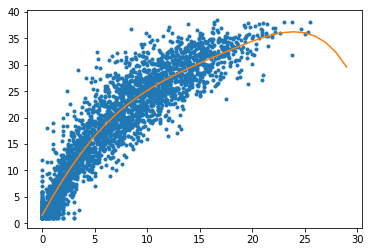

In [60]:
points_y = players_ratio_df['Min'].tolist()
points_x = players_ratio_df['Pts'].tolist()
points_x = np.array(points_x)
points_y = np.array(points_y)
points_x = points_x[~np.isnan(points_y)]
points_y = points_y[~np.isnan(points_y)]

ii = np.argsort(points_x)
points_y = points_y[ii]
points_x = np.sort(points_x)

fitted_minutes_coeff = np.polyfit(points_x, points_y, 5)
all_possible_points = np.arange(0, 30)
#fitted_y = np.polyval(fitted_minutes_coeff, points_x)
fitted_y = np.polyval(fitted_minutes_coeff, all_possible_points)
plt.plot(points_x, points_y, '.')
plt.plot(all_possible_points, fitted_y)

c:\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
c:\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


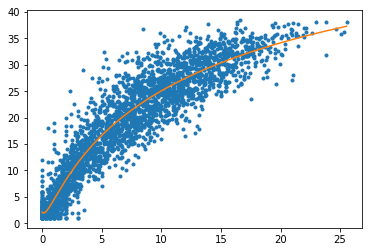

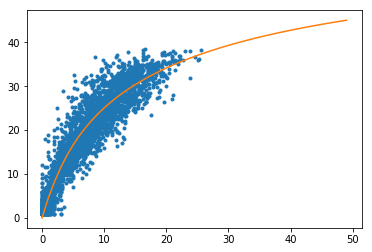

In [79]:
def func(x, a, b, c, d, e, f, g):
    #return a * np.sqrt(x*b + c) + d + g*x**2
    return a * np.power(x*b + c, 0.3) + d + e*np.log(x*f + g)
points_y = players_ratio_df['Min'].tolist()
points_x = players_ratio_df['Pts'].tolist()
points_x = np.array(points_x)
points_y = np.array(points_y)
points_x = points_x[~np.isnan(points_y)]
points_y = points_y[~np.isnan(points_y)]

ii = np.argsort(points_x)
points_y = points_y[ii]
points_x = np.sort(points_x)

all_possible_points = np.arange(0, 50)

popt, pcov = curve_fit(func, points_x, points_y)

fitted_y = func(points_x, *popt)
fitted_y_all = func(all_possible_points, *popt)

plt.plot(points_x, points_y, '.')
plt.plot(points_x, fitted_y)

fitted_y_all[0] = 0
plt.figure()
plt.plot(points_x, points_y, '.')
plt.plot(all_possible_points, fitted_y_all)
np.save('fitted_minutes_from_points', fitted_y_all)

# Detect Mismatchs:
* mismatch between calculated sum of points to specified sum
* finding games with one team only
* mismatch between point sum derived from players dataframe and point sum derived from games dataframe

In [13]:
players_df3 = players_df2[players_df2['M_2PT'] == 0]
players_df4 = players_df3[np.logical_not(players_df['Pts']) == 0]

game_ids = copy.deepcopy(games_df['game_id'])

bad_idxs1 = [] # indexes with wrong sum of points
bad_idxs2 = [] #indexes with only one team

for k in tqdm(range(len(game_ids))):
    #k = 1
    game_id = str(game_ids[k])
    df_players_of_game = players_df[players_df['game_id'] == game_id]
    team_names = df_players_of_game['team_name']
    team_names = team_names.tolist()
    team_names = np.unique(team_names)
    points = df_players_of_game.groupby('team_name')['Pts'].sum()
    cur_game = games_df[games_df['game_id'] == game_ids[k]]
    
    if len(points) < 2:
        bad_idxs2.append(k)
        continue
    
    diff_by_sum = np.abs(points[0] - points[1])
    diff_by_game = np.abs(cur_game['away_team_points'][k] - cur_game['home_team_points'][k])
    
    if not (diff_by_sum == diff_by_game):
        bad_idxs1.append(k)

c:\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


71774

# Examining a single example of a mismatch:

In [71]:
# example of 1st kind of mistake
random_i = 50
idx = bad_idxs1[random_i]

game_id = str(game_ids[idx])
df_players_of_game = players_df[players_df['game_id'] == game_id]
team_names = df_players_of_game['team_name']
team_names = team_names.tolist()
team_names = np.unique(team_names)
points = df_players_of_game.groupby('team_name')['Pts'].sum()
cur_game = games_df[games_df['game_id'] == game_ids[idx]]
df_players_of_game

,#,A_2PT,M_2PT,Min,Pts,SF,game_id,game_name,player_id,player_name,team_id,team_name
43987,14.0,17,9,39.0,28,True,2865,Haifa BC (A) W,234,Lucius Davis,57,M. Rishon Letsion
44161,14.0,2,2,36.0,26,True,2865,Haifa BC (A) W,233,Darryl Wilson,57,M. Rishon Letsion
44241,14.0,7,4,34.0,15,True,2865,M. Rishon Letsion (H) L,218,Corey Gaines,54,Haifa BC
44258,14.0,13,8,36.0,25,True,2865,M. Rishon Letsion (H) L,188,Marko Bulic,54,Haifa BC
44485,14.0,17,7,25.0,17,True,2865,M. Rishon Letsion (H) L,241,Petar Arsic,54,Haifa BC
44636,14.0,1,0,32.0,13,False,2865,Haifa BC (A) W,228,Guy Goodes,57,M. Rishon Letsion
44903,14.0,4,1,15.0,8,False,2865,M. Rishon Letsion (H) L,184,Ilan Kadosh,54,Haifa BC
45454,14.0,1,1,17.0,2,True,2865,Haifa BC (A) W,231,Avishay Gordon,57,M. Rishon Letsion
45577,14.0,2,0,29.0,7,True,2865,Haifa BC (A) W,232,Amit Ben David,57,M. Rishon Letsion
45761,14.0,1,0,7.0,0,False,2865,Haifa BC (A) W,239,Pini Levy,57,M. Rishon Letsion


# Players play time distribution (in minutes):

In [ ]:
game_ids = copy.deepcopy(games_df['game_id'])
for k in range(len(game_ids)):
    game_id = game_ids[k]
    df_players_of_game = players_df[players_df['game_id'] == game_id]

c:\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


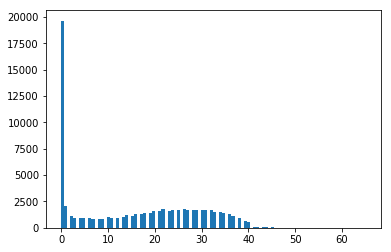

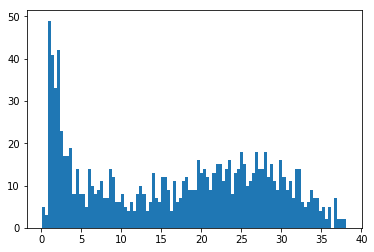

In [54]:
minutes = copy.deepcopy(players_df['Min'])
minutes = minutes[np.logical_not(np.isnan(minutes))]
players_minutes_played = players_df.groupby('player_name')['Min'].mean()
plt.title('minutes played distribution - NaN is zero')
plt.hist(minutes, bins=100)
plt.show()
plt.title('minutes played distribution - no NaNs')
plt.hist(players_minutes_played[np.logical_not(np.equal(players_minutes_played, 0))], bins=100);

## number of fouls vs. minutes played:

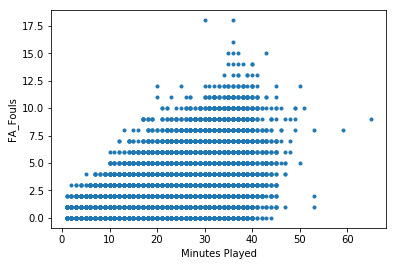

In [14]:
plt.plot(players_df['Min'], players_df['FA_Fouls'], '.')
plt.xlabel('Minutes Played');
plt.ylabel('FA_Fouls');

# Examining data from a specific player - ID 162:

In [26]:
ids = copy.deepcopy(players_df2['player_id']).tolist()
max_len = 0
max_i = 0
for i in ids:
    if len(players_df[players_df['player_id'] == i]) > max_len:
        max_len = len(players_df[players_df['player_id'] == i])
        max_i = i

In [23]:
single_player = copy.deepcopy(players_df2[players_df2['player_id'] == '162'])
df_dates = games_df[['game_id', 'datr']].copy()
df_dates['game_id'] = df_dates['game_id'].astype(str)
single_player2 = single_player.merge(df_dates, on='game_id')
single_player2 = single_player2.drop_duplicates('game_id')
single_player2.sort_values(by='datr')

,#,%_1PT,%_2PT,%_3PT,AS,A_1PT,A_2PT,A_3PT,BKA_Blocks,BKF_Blocks,...,TR_Rebounds,VAL,game_id,game_name,player_id,player_name,team_id,team_name,throws/shots_ratio,datr
22,1.0,0.600,0.667,0.667,4,5,6,3,0.0,0.0,...,5,27.0,2962,Ashkelon (H) W,162,Reggie Moore,40,maccabi rishon lezion (coach: gilad katz),0.666667,2006-11-05
38,2.0,0.909,0.500,0.600,0,11,8,5,0.0,0.0,...,6,30.0,2966,Bnei Hashron (A) L,162,Reggie Moore,40,maccabi rishon lezion (coach: gilad katz),0.538462,2006-11-12
24,3.0,0.833,0.600,0.000,4,6,5,2,0.0,0.0,...,8,19.0,2971,Givat Shmuel (H) W,162,Reggie Moore,40,maccabi rishon lezion (coach: gilad katz),0.428571,2006-11-19
40,4.0,0.500,0.538,0.400,0,4,13,5,0.0,0.0,...,6,14.0,2977,Nahariya (A) L,162,Reggie Moore,40,maccabi rishon lezion (coach: gilad katz),0.500000,2006-11-26
26,5.0,1.000,0.000,0.000,2,2,4,3,0.0,0.0,...,6,3.0,2980,Ramat Gan (H) L,162,Reggie Moore,40,maccabi rishon lezion (coach: gilad katz),0.000000,2006-12-03
42,6.0,0.833,0.200,0.000,2,6,5,1,1.0,1.0,...,6,9.0,2988,Galil (A) L,162,Reggie Moore,40,maccabi rishon lezion (coach: gilad katz),0.166667,2006-12-10
28,7.0,0.833,0.667,0.200,1,6,12,5,0.0,0.0,...,5,21.0,2989,Gilboa/Afula (H) W,162,Reggie Moore,40,maccabi rishon lezion (coach: gilad katz),0.529412,2006-12-17
44,8.0,0.786,0.583,0.400,0,14,12,5,1.0,0.0,...,5,31.0,2998,M. Tel-Aviv (H) L,162,Reggie Moore,40,maccabi rishon lezion (coach: gilad katz),0.529412,2007-01-21
30,9.0,0.750,0.000,0.000,1,4,1,0,0.0,0.0,...,0,4.0,3050,Hapoel J. (A) L,162,Reggie Moore,40,maccabi rishon lezion (coach: gilad katz),0.000000,2007-01-28
46,10.0,0.900,0.000,0.333,1,10,2,3,0.0,0.0,...,5,17.0,3007,Ashkelon (A) W,162,Reggie Moore,40,maccabi rishon lezion (coach: gilad katz),0.200000,2007-02-11


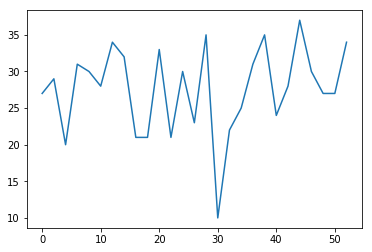

In [26]:
plt.plot(single_player2['Min'])

# Specific player examination - ID 100:

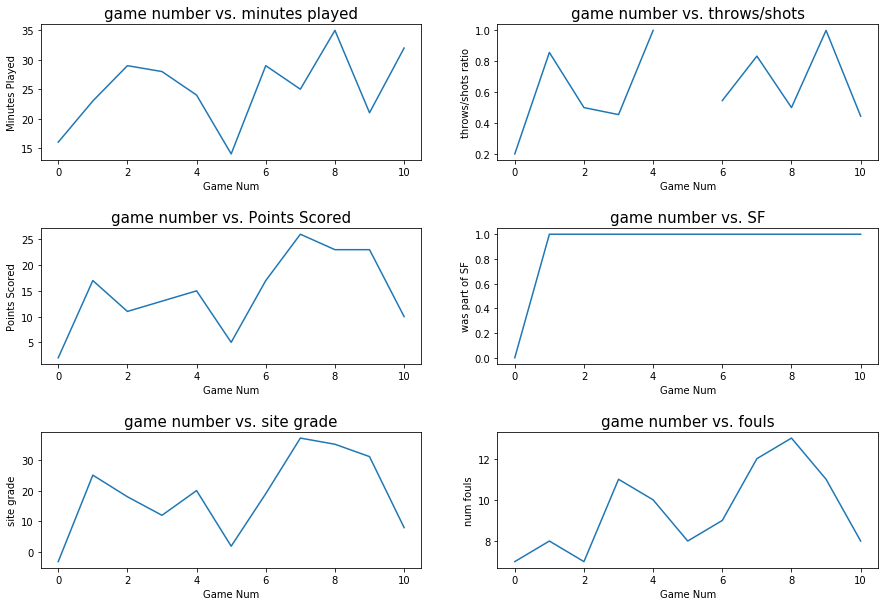

In [45]:
check_player_id = '100'

single_player = copy.deepcopy(players_df2[players_df2['player_id'] == check_player_id])
df_dates = games_df[['game_id', 'datr']].copy()
df_dates['game_id'] = df_dates['game_id'].astype(str)
single_player2 = single_player.merge(df_dates, on='game_id')
single_player2 = single_player2.drop_duplicates('game_id')
single_player2.sort_values(by='datr')

plt.figure(figsize=[15,10])
plt.subplots_adjust(hspace = 0.5)
plt.subplot(3, 2, 1)
plt.plot(single_player2['Min'])
plt.xlabel('Game Num');
plt.ylabel('Minutes Played');
plt.title('game number vs. minutes played', fontsize=15)
plt.subplot(3, 2, 2);
plt.plot(single_player2['throws/shots_ratio'])
plt.xlabel('Game Num');
plt.ylabel('throws/shots ratio');
plt.title('game number vs. throws/shots', fontsize=15)
plt.subplot(3, 2, 3)
plt.plot(single_player2['Pts'])
plt.xlabel('Game Num');
plt.ylabel('Points Scored');
plt.title('game number vs. Points Scored', fontsize=15)
plt.subplot(3, 2, 4);
plt.plot(single_player2['SF'])
plt.xlabel('Game Num');
plt.ylabel('was part of SF');
plt.title('game number vs. SF', fontsize=15)
plt.subplot(3, 2, 5);
plt.plot(single_player2['VAL'])
plt.xlabel('Game Num');
plt.ylabel('site grade');
plt.title('game number vs. site grade', fontsize=15)
plt.subplot(3, 2, 6);
plt.plot(single_player2['PF_Fouls'] + single_player2['FA_Fouls'])
plt.title('game number vs. fouls', fontsize=15)
plt.xlabel('Game Num');
plt.ylabel('num fouls');

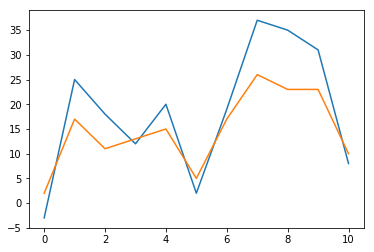

In [46]:
plt.plot(single_player2['VAL'])
plt.plot(single_player2['Pts'])

# Remove both mismatched and save players dataframe:

In [ ]:
print(len(players_df))
flags = np.ones((len(players_df), 1))
flags[bad_idxs1] = 0
flags[bad_idxs2] = 0
flags = (flags[:, 0].astype(bool).tolist())
players_df = players_df[flags]
print(len(players_df))
players_df.to_pickle('players_df')